<Axes: >

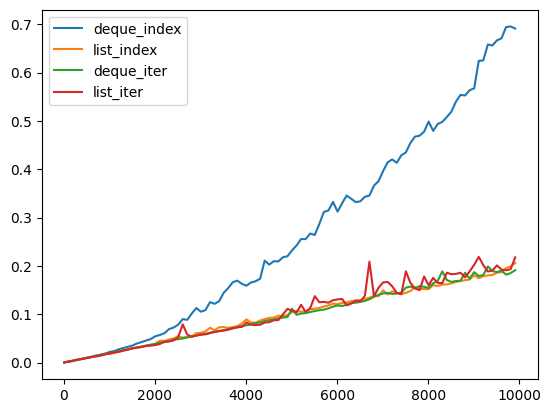

In [19]:
import timeit
import pandas as pd
from collections import deque


def build_deque(n):
    return deque(range(n))

def build_list(n):
    return list(range(n))

def iter_index(d):
    for i in range(len(d)):
        d[i]

def iter_iter(d):
    d_iter = iter(d)
    while True:
        try:
            next(d_iter)
        except StopIteration:
            break

r = range(10, 10001, 100)

list_index_runs = [timeit.timeit('iter_index(l)', 'from __main__ import build_list, iter_index; l = build_list({})'.format(n), number=1000) for n in r]
deque_index_runs = [timeit.timeit('iter_index(d)', 'from __main__ import build_deque, iter_index; d = build_deque({})'.format(n), number=1000) for n in r]
deque_iter_runs = [timeit.timeit('iter_iter(d)', 'from __main__ import build_deque, iter_iter; d = build_deque({})'.format(n), number=1000) for n in r]
list_iter_runs = [timeit.timeit('iter_iter(d)', 'from __main__ import build_list, iter_iter; d = build_list({})'.format(n), number=1000) for n in r]

df = pd.DataFrame({'deque_index':deque_index_runs, 'list_index':list_index_runs, 'deque_iter': deque_iter_runs, 'list_iter': list_iter_runs}, index=r)
df.plot()